# Ejemplo de Regresión Logística: usuarios PC

Realizaremos un ejercicio de ejemplo para comprender cómo funciona este algoritmo. En este caso, utilizaremos un dataset en el que almacenaremos distintas características de las sesiones de usuarios de Windows, MAC y Linux, e intentaremos predecir a cuál de los S.O. pertenece un nuevo usuario en función de estos parámetros.

Para ello, empezamos importando librerías, que cada día tenemos más:

In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargamos los datos

Lo primero es cargar los datos, ya que sin ellos poco podemos predecir:

In [6]:
dataframe = pd.read_csv("data/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


## Análisis exploratorio

Tras ello, lo suyo es hacer un poco de EDA básico. En un proyecto real, tendríamos que estudiarlo más a fondo, pero en este caso, como estamos ante un ejemplo, no profundizaremos en demasía.

Empezaremos haciendo un conteo de los valores tanto de las páginas (que es una variable de la que queremos conocer qué valores toma) como los de la clase (que será el target que estamos intentando predecir), para ver cómo se distribuyen:

In [7]:
dataframe.paginas.value_counts()

1    80
2    55
3    11
4    10
5     7
6     4
9     2
7     1
Name: paginas, dtype: int64

In [8]:
dataframe['clase'].value_counts()

0    86
2    44
1    40
Name: clase, dtype: int64

Luego, el típico ``describe`` para caracterizar los datos a grandes rasgos:

In [9]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


## Visualizamos los datos

También haremos un par de gráficas interesantes para completar el EDA. En ellas, podremos ver tanto la distribución (mediante histograma) como la relación entre cada una de las variables (con un correlograma):

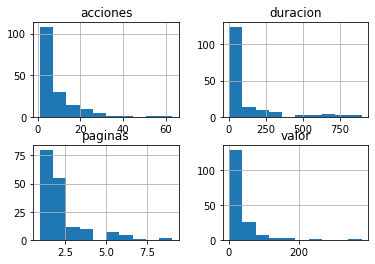

In [10]:
dataframe.drop(['clase'], 1).hist()
plt.show()

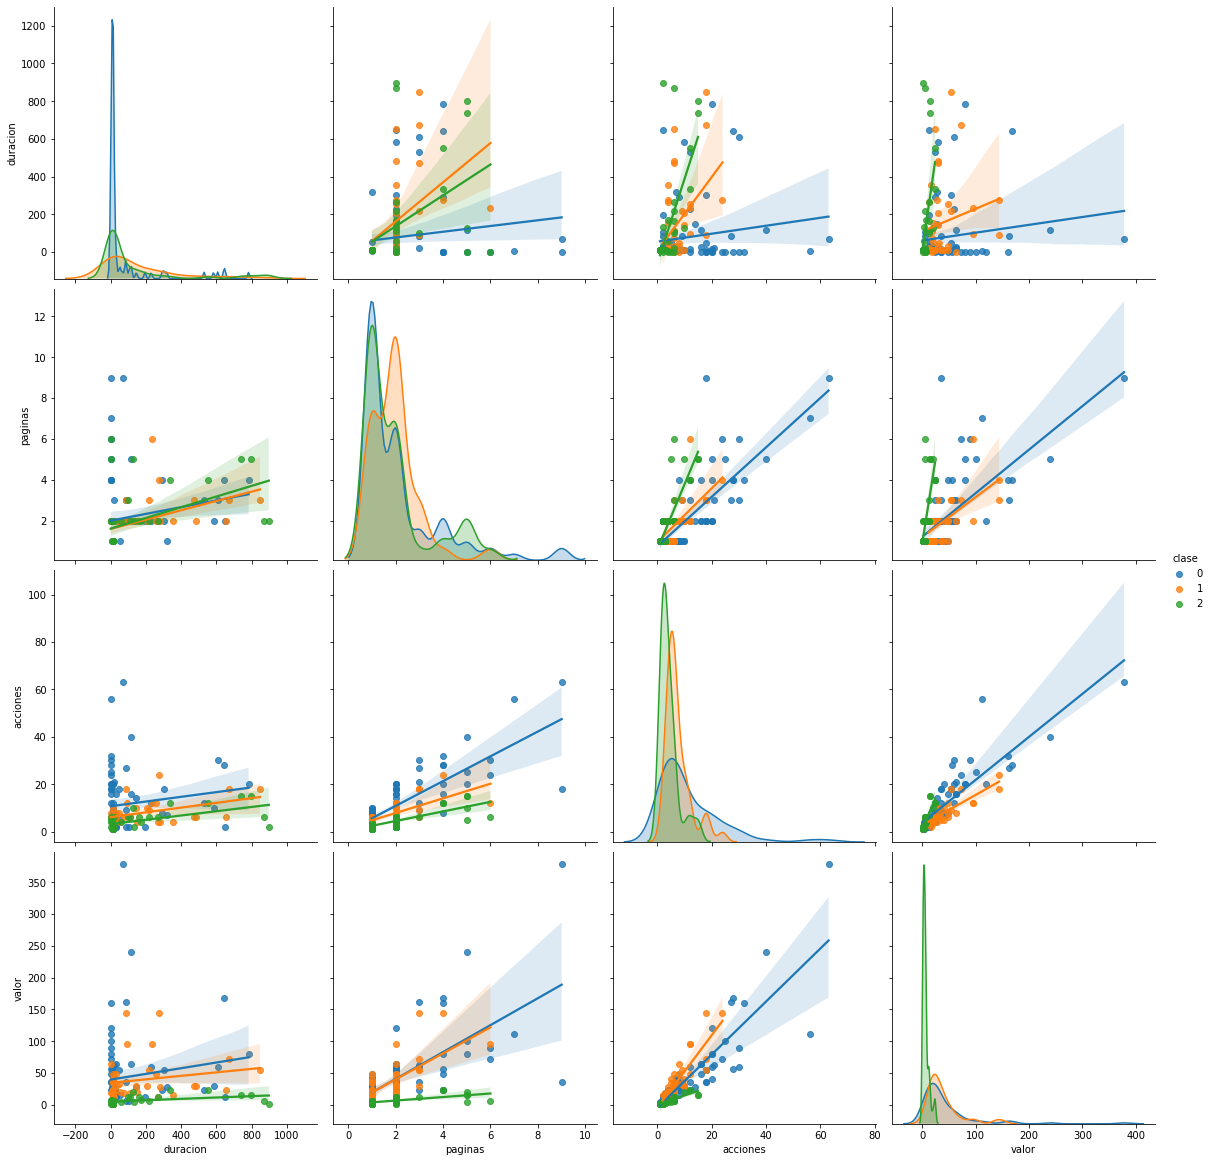

In [11]:
sns.pairplot(dataframe.dropna(),
            hue='clase',
            height=4,
            vars=["duracion", "paginas","acciones","valor"],
            kind='reg'); # "reg" de regresión lineal

De todas estas gráficas, tomarán especial interés las correspondientes a la variable target, es decir, la 'clase'.

## Creamos el modelo

Una vez analizados (brevemente) los datos, pasamos a la creación del modelo. Para ello, utilizaremos los datos sin la variable target (clase):

In [12]:
dataframe.drop(['clase'], 1)

,duracion,paginas,acciones,valor
0,7.0,2,4,8
1,21.0,2,6,6
2,57.0,2,4,4
3,101.0,3,6,12
4,109.0,2,6,12
...,...,...,...,...
165,13.0,1,7,42
166,12.0,1,2,6
167,13.0,1,3,9
168,13.0,1,7,28


In [32]:
# En este caso no dividimos en train_test, pues estamos ante un ejemplo básico para entender el problema. Separamos directamente en variables 
# predictoras (X) y variable a predecir (y):
X = dataframe.drop(['clase'], axis=1)
y = dataframe['clase']
X.shape

(170, 4)

In [33]:
# Creamos modelo:
model = linear_model.LogisticRegression(max_iter=250)

# Lo entrenamos:
model.fit(X, y)

LogisticRegression(max_iter=250)

Como puedes ver, hemos utilizado el parámetro ``max_iter``. Esto es debido a que, por defecto, el modelo no convergía al realizar el Descenso de Gradiente. También podemos variar el parámetro ``multi_class`` para decidir qué método utilizar para el multiclase, lo que también puede hacer que converja.

Bueno, volviendo al problema, hagamos las predicciones:

In [34]:
predictions = model.predict(X)
predictions

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
predict_probab = model.predict_proba(X)
np.round(predict_probab, 2)

array([[0.22, 0.09, 0.68],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.18, 0.08, 0.74],
       [0.28, 0.1 , 0.62],
       [0.27, 0.08, 0.65],
       [0.05, 0.05, 0.9 ],
       [0.22, 0.09, 0.69],
       [0.09, 0.06, 0.84],
       [0.  , 0.  , 1.  ],
       [0.13, 0.07, 0.8 ],
       [0.32, 0.09, 0.6 ],
       [0.1 , 0.06, 0.84],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.23, 0.09, 0.68],
       [0.  , 0.  , 1.  ],
       [0.65, 0.34, 0.01],
       [0.58, 0.42, 0.  ],
       [0.73, 0.27, 0.  ],
       [0.71, 0.29, 0.  ],
       [0.32, 0.68, 0.  ],
       [0.82, 0.18, 0.  ],
       [0.46, 0.54, 0.  ],
       [0.78, 0.22, 0.  ],
       [0.37, 0.63, 0.  ],
       [0.09, 0.91, 0.  ],
       [0.72, 0.28, 0.  ],
       [0.45, 0.52, 0.03],
       [0.5 , 0.5 , 0.  ],
       [0.35, 0.65, 0.  ],
       [0.22, 0.78, 0.  ],
       [0.26, 0.74, 0.  ],
       [0.22, 0.78, 0.  ],
       [0.64, 0.36, 0.  ],
       [0.01, 0.  , 0.99],
       [0.03, 0.02, 0.95],
 

In [26]:
model.score(X, y) # accuracy

0.7764705882352941

## EJERCICIO

1. El método ``model.score()`` nos devuelve el accuracy del modelo basado en los resultados de la predicción. Calcula el accuracy por tu cuenta y comprueba que realmente se cumple

In [31]:
# ACCURACY - nivel de acierto suma de acierto/total casos
dif = y - predictions
aciertos = (dif == 0).sum()
accuracy = (aciertos/len(dif))
accuracy

0.7764705882352941

## Cómo presentar los resultados

Para hacer el reporte de los resultados, podemos ayudarnos de la matriz de confusión, que en los casos multiclase se suele agradecer, ya que resume muy bien qué está haciendo nuestro algoritmo:

In [37]:
c_matrix = confusion_matrix(y, predictions)
c_matrix

array([[73,  7,  6],
       [25, 15,  0],
       [ 0,  0, 44]], dtype=int64)

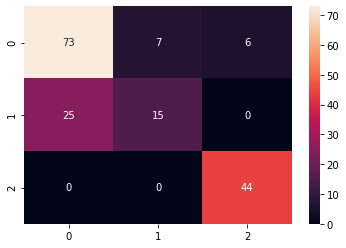

In [38]:
import seaborn as sns
sns.heatmap(c_matrix, annot=True);

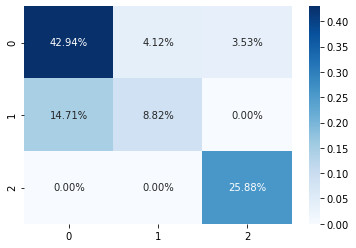

In [40]:
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

El accuracy también puede ser calculado con la función accuracy_score, del módulo sklearn.metrics (que ya hemos importado al principio). Del mismo modo que obtenemos el porcentaje de acierto, podemos obtener el de error.

Cabe destacar que, para saber si un algoritmo de clasificación es bueno o no, debemos compararlo con el caso aleatorio. Es decir, para saber si un clasificador binario es útil, o sería mejor utilizar una moneda a cara o cruz, lo que tendremos que hacer será comprobar el accuracy con 0,5%.
  - En caso de ser superior, será bueno. Bueno, realmente será bueno si es notablemente superior a 0,5% y no es debido a la aleatoriedad (que dependiendo de las muestras varíe de media en torno al 0,5%).
  - En caso de ser inferior, ¿qué opinas? Si tenemos un porcentaje por debajo del 0,5%, el resultado será que fallamos más de lo que acertamos, lo cual es peor que jugárnosla aleatoriamente. Sin embargo, la realidad ante esta situación puede ser vista de otro modo, ya que si tenemos un algritmo que tiene una precisión notablemente inferior al 0,5% y nos damos cuenta (porque igual es un buen algoritmo pero estamos fallando en algún cambio de signo o algo simple), podríamos añadir un último paso en el que seleccionáramos lo contrario, y así tendríamos un porcentaje superior a ese 0,5%.
  - Si nos mantenemos en torno al 0,5%, el resultado es prácticamente aleatorio, así que no nos serviría de mucho nuetro algoritmo y deberíamos repensar las cosas.


Por otra parte, si nos encontramos ante un clasificador de ``N`` clases, la cosa no es exactamente igual, ya que entran más opciones en juego. La comparación, en lugar de con 50% será con $\frac{1}{N}$. Además, ahora no podemos utilizar la inversa, ya que no existe ese concepto extendido a más de 2 clases.

De este modo, si nos encontramos ante un clasificador de 3 clases, como el que tenemos en este ejemplo, la probabilidad con la que tendríamos que compararlo sería 33%. Si tenemos un accuracy considerablemente superior, tendríamos un buen clasificador, mientras que si obtneemos un resultado que varía poco respecto a esta cifra, deberemos replantearnos el problema.



In [41]:
acierto = accuracy_score(y, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 77.65 %
Error: 22.35 %


### EJERCICIO

1. Implementa en funciones las siguientes métricas definidas en clase (tomando como parámetros las $y$ reales y las predichas):
    - Precision
    - Recall
    - F1-Score
    
    
2. Lee el dataset de Futbolistas y, en función de los atributos numéricos (incluyendo los que puedas extraer de dob, si quieres), intenta predecir si un jugador es diestro o zurdo. Para evaluar el modelo, utiliza tanto en accuracy como los 3 métodos que acabas de crear.

3. Prueba a convertir los "Diestros" en 1 y los "Zurdos" en 0 (o viceversa) y prueba a lanzar un modelo lineal a ver qué resultados saca. Compruébalo con el R^2. Después, pon un umbral de decisión en 0.5 y comprueba el accuracy.

4. Vuelve a realizar los cálculos para el modelo de regresión lineal pero validando sus resultados con ua división train-test del 0.3

In [42]:
# 1.
df = pd.read_csv("../../../data/FIFA20.csv")

from sklearn.metrics import precision_score



In [2]:
# 2.


In [4]:
# 3.


In [5]:
# 4.


### EJERCICIO

1. Lee el dataset de Pokemon e intenta predecir el "Type 1" del pokémon ne base a sus estadísticas numéricas. Evalúa los resultados del modelo.

2. Realiza lo mismo pero con división train-test de 25%-75%

EXTRA: Intenta sacar la predicción del modelo con los 3 más probables y calcula su accuracy, siendo 1 si está entre los 3 más probables y 0 si no.

In [15]:
# 1.
df = pd.read_csv("../../../data/Pokemon.csv", encoding='latin1')


In [9]:
# 2.


# Clasificación de nuevos registros

Evidentemente, una vez tenemos el modelo, podemos predecir para nuevos registros:

In [43]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

array([2], dtype=int64)

# Adicional: Validación del Modelo

Vovlamos al caso principal del notebook, donde evaluábamos si un usuario tenía un SO Windows, Mac o Linux, en base a sus sesiones.

Si evaluamos el modelo para una separación concreta de datos, obtendremos lo siguiente:

In [101]:
seed = 79
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=seed)

model = linear_model.LogisticRegression(max_iter=1000)

# Lo entrenamos:
model.fit(X_train, y_train)

# Predecimos sobre test:
model.score(X_test, y_test)

0.803921568627451

Del mismo modo, si repetimos el experimento para otra división de train-test (por ejemplo, cogiendo otra semilla), los resultados pueden variar:

In [102]:
seed = 382
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=seed)

model = linear_model.LogisticRegression(max_iter=1000)

# Lo entrenamos:
model.fit(X_train, y_train)

# Predecimos sobre test:
model.score(X_test, y_test)

0.5882352941176471

En este caso, hemos buscado situaciones extremas, pero esto puede ocurrir en mayor o menor medida con nuestros datos, sobre todo si tenemos pocas muestras. Por lo tanto, podemos decir que nuestro resultado de test depende mucho de cómo hayamos elegido los datos, es decir, tiene overfitting pues depende mucho de qué datos hayamos elegido para train. Si no están lo suficientemente aleatorizados, se podrían extraer patrnes que no se cumplan de forma general y obtener resultados de test muy variantes.

Para minimizar esto, surge la validación cruzada que, como hemos visto en clase, consiste en coger nuestro train y dividirlo a su vez en múltiples train y test, de modo que se evalúen varias posibilidades y podamos obtenr un rango variante de valores. Con la validación cruzada, podemos obtener varios valores de nuestros test y así poder promediar tanto el porcentaje de acierto como la desviación de este y así obtener una idea de si nuestro algoritmo es bueno o es muy dependiente de los datos de entrada.

En el futuro, veremos que es una técnica ideal para comparar diferentes algoritmos.

Por ejemplo, escojamos un K de 10 (valor típico) para hacer esa validación cruzada:

In [109]:
name='Logistic Regression'
k = 10

model = linear_model.LogisticRegression(max_iter=1000)

kfold = model_selection.KFold(n_splits=k) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.58333333 0.66666667 0.75       0.75       0.66666667 0.75
 0.91666667 1.         0.91666667 0.72727273]
Logistic Regression: 0.772727 (0.124528)


De hecho, si represetnamos unas cuantas combinaciones de nuestros datos para predecir, obtenemos lo que no viene a dar el CV:

In [141]:
score_list = []

for i in range(1, 4000):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=seed)
    model.fit(X_train, y_train)
    score_list += [model.score(X_test, y_test)]

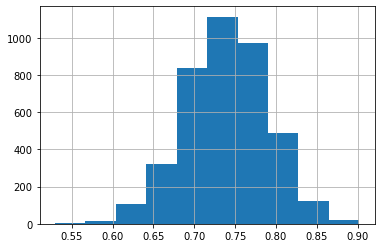

In [143]:
pd.Series(score_list).hist()

¿Y para qué nos servirá esto?

Pues principalmente para saber dónde estamos realmente y no dejarnos engañar por las ilusiones que puede dar cierta selección de datos. Así como separar train-test nos permite evitar en cierta parte el overfitting debido a que estábamos exponiéndonos demasiado a nuestros datos y no estábamos evaluando cómo generalizaríamos, hacer la validación cruzada nos reduce aún más este efecto, pues buscamos ver cómo se comporta simulando varios escenarios.

Existe una versión del cross validation que es la más "bestia" de todas, ya que no hace una separación de 10 o 5 folds, sino que lo hace de 1 vs el resto, de modo que entrenamos en modelo un total de n veces para una muestra de n elementos. Se llama [Leave One Out](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)

In [144]:
 import numpy as np
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo.get_n_splits(X_train)

119

In [146]:
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=loo, scoring='accuracy')

In [147]:
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.]
Logistic Regression: 0.773109 (0.418821)


### EJERCICIO

1. Prueba a evaluar los modelos vistos en este notebook con cross validation. Realiza modificaciones sobre nuestro modelo para intentar obtener un algoritmo que nos permita obtener mejores resultados en base a ello (prueba a quitar variables para que no nos afecte tanto la selección del set de entrenamiento/test). Si no ves que mejore quitando ninguna variable, mantendremos los datos que tenemos: